<a href="https://colab.research.google.com/github/a0pro0b/Heart-Failure-Prediction-Using-Python-Web-Framework/blob/main/HEART%20FAILURE%20PREDICTION%20USING%20PYTHON%20WEB%20FRAMEWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pickle

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


In [ ]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
print('Data read successfully')

data_1 = data.copy()

data.head()

Data read successfully


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data.shape
data.info()
data.describe(include='all')
data.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


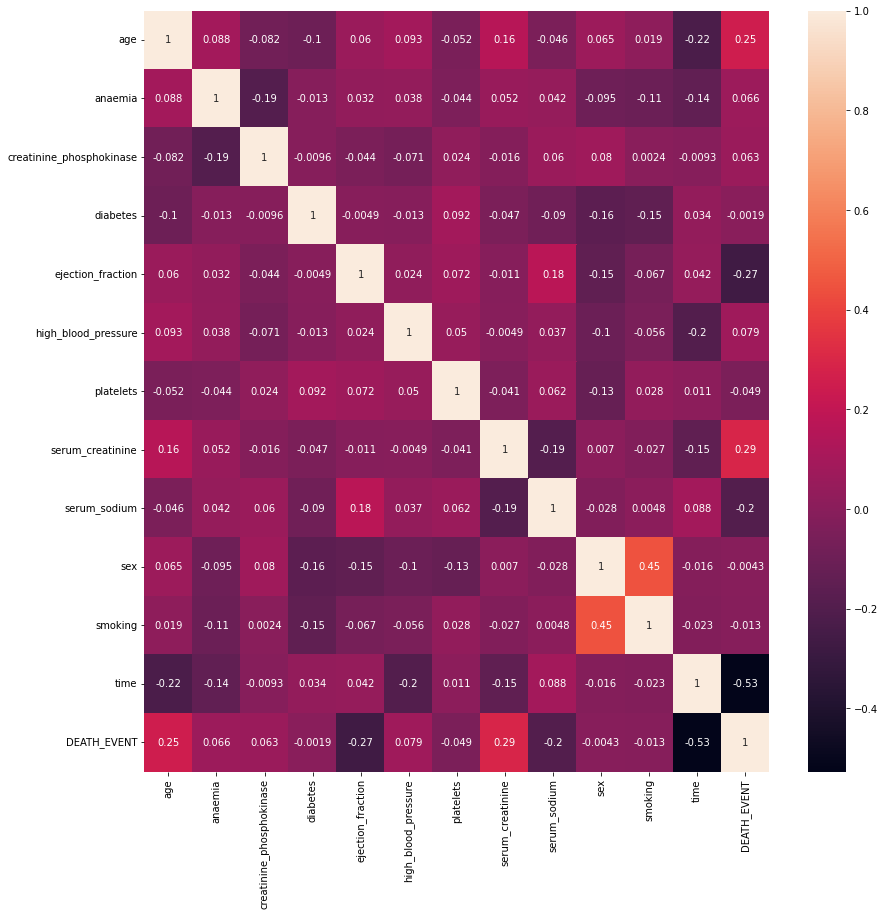

In [ ]:
plt.figure(figsize=(14, 14))
sns.heatmap(data.corr(), annot=True)
plt.show()

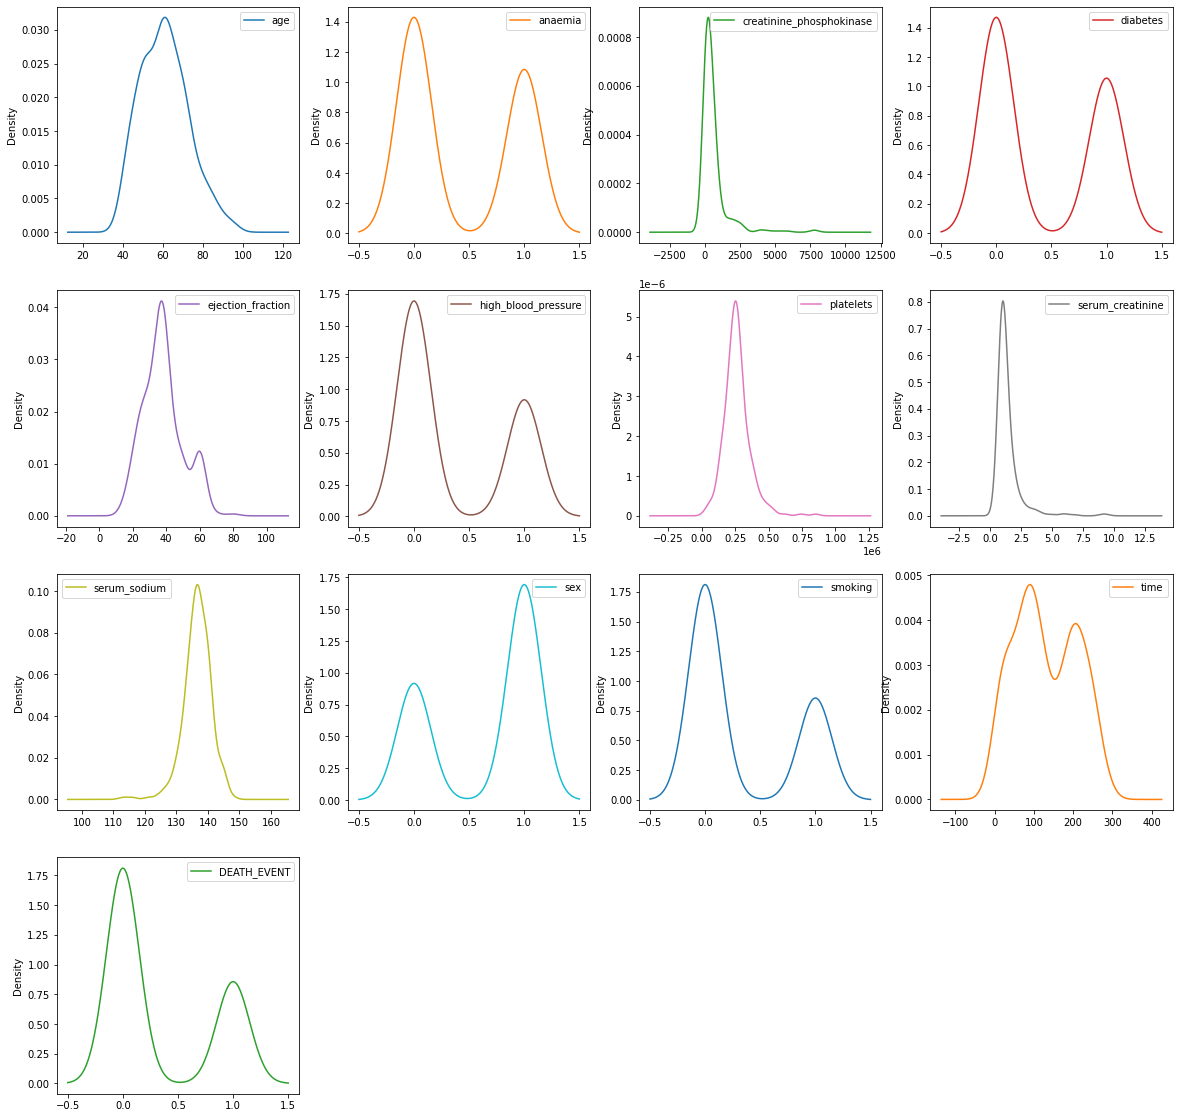

In [ ]:
fig = plt.figure(figsize=(20, 20))
ax = fig.gca()
data.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, ax=ax)
plt.show()

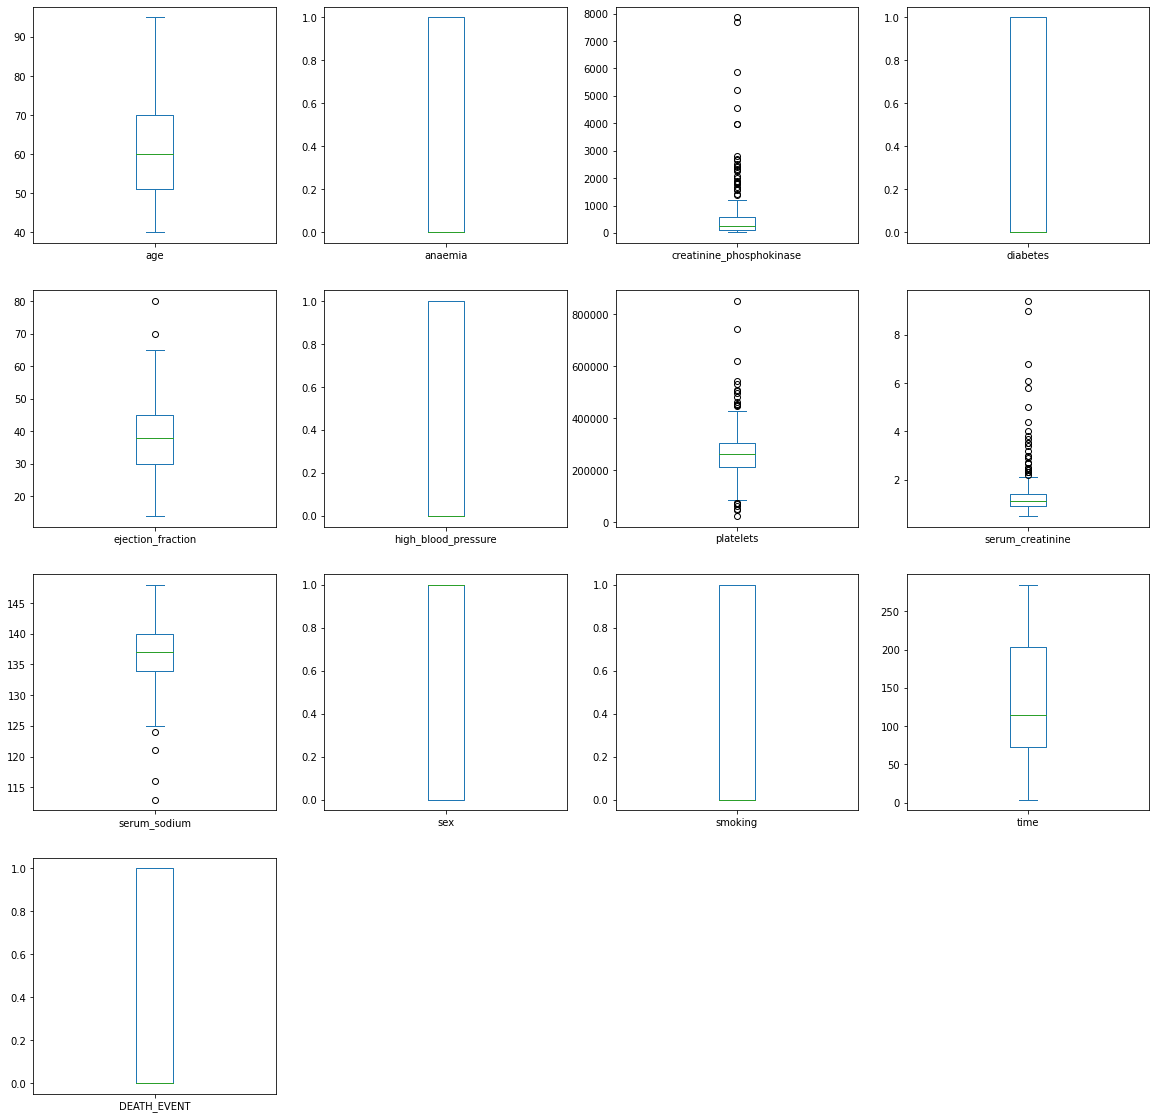

In [ ]:
fig = plt.figure(figsize=(20, 20))
ax = fig.gca()
data.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, ax=ax)
plt.show()

Percentage of Super Senior people lose their life : 72.22222222222221


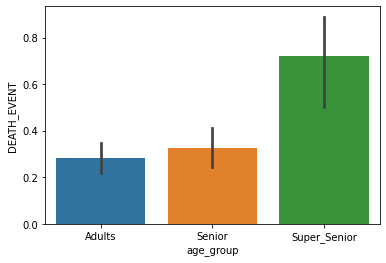

In [ ]:
bins = [40, 60, 80, np.nan]
labels = ['Adults', 'Senior', 'Super_Senior']

data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

print('Percentage of Super Senior people lose their life :', data['DEATH_EVENT'][data['age_group']=='Super_Senior'].value_counts(normalize=True)[1]*100)

sns.barplot(x='age_group', y='DEATH_EVENT', data=data)
plt.show()

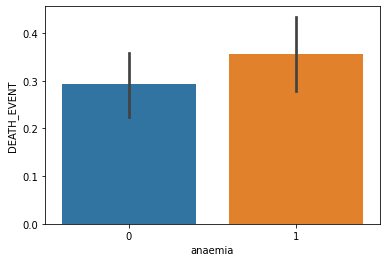

In [ ]:
sns.barplot(x='anaemia', y='DEATH_EVENT', data=data)
plt.show()

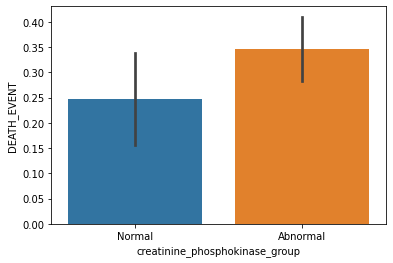

In [ ]:
bins = [10, 120, np.nan]
labels = ['Normal','Abnormal']
data['creatinine_phosphokinase_group'] = pd.cut(data['creatinine_phosphokinase'], bins=bins, labels=labels)

sns.barplot(x='creatinine_phosphokinase_group', y='DEATH_EVENT', data=data)
plt.show()

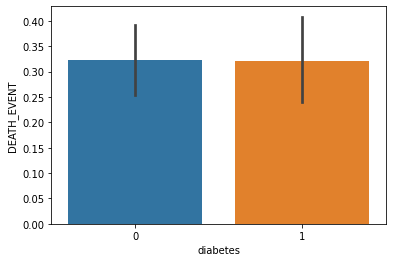

In [ ]:
sns.barplot(x='diabetes', y='DEATH_EVENT', data=data)
plt.show()

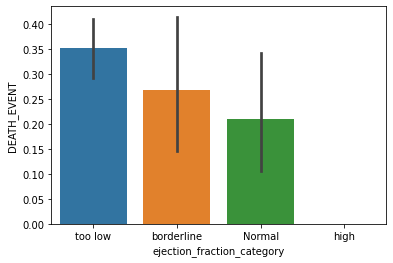

In [ ]:
bins = [0, 41, 50, 70, np.nan]
labels = ['too low', 'borderline', 'Normal', 'high']
data['ejection_fraction_category'] = pd.cut(data['ejection_fraction'], bins=bins, labels=labels)

data['ejection_fraction_category'].value_counts()

sns.barplot(x='ejection_fraction_category', y='DEATH_EVENT', data=data)
plt.show()

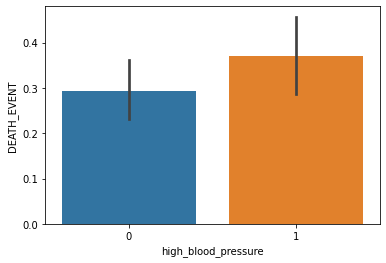

Percentage of people resulted in Heart Failure having high blood pressure :  37.142857142857146


In [ ]:
sns.barplot(x='high_blood_pressure', y='DEATH_EVENT', data=data)
plt.show()

print('Percentage of people resulted in Heart Failure having high blood pressure : ', data['DEATH_EVENT'][data['high_blood_pressure']==1].value_counts(normalize=True)[1]*100)

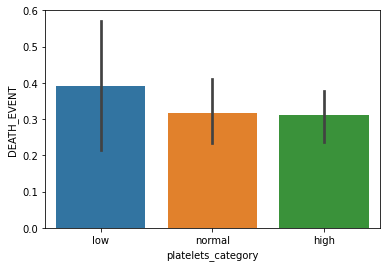

In [ ]:
bins =[0, 150000, 250000, np.nan]
labels =['low', 'normal', 'high']
data['platelets_category'] = pd.cut(data['platelets'], bins=bins, labels=labels)

sns.barplot(x='platelets_category', y='DEATH_EVENT', data=data)
plt.show()

In [ ]:
array = data_1.values
X = array[:, :12]
Y = array[:, 12]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.67, random_state=1)

In [ ]:
# Standard Scalar
scalar = StandardScaler()
rescaled_X = scalar.fit_transform(x_train)
print(rescaled_X[:5])

[[-0.24551621  1.13095967  1.51464342  1.28399714  0.04496884 -0.81302949
   0.2879158  -0.3726744   0.84019006 -1.37198868 -0.66421116  0.79189932]
 [-0.24551621  1.13095967 -0.51530291 -0.77881794 -1.58723367 -0.81302949
  -0.49111079 -0.633982    0.43755619  0.72886899  1.50554531 -0.6772304 ]
 [ 0.01888586  1.13095967  1.0475922  -0.77881794  0.45301947 -0.81302949
  -1.78291436 -0.633982    0.03492233  0.72886899 -0.66421116  0.77901221]
 [ 0.19515391 -0.88420483 -0.45078806 -0.77881794  0.8610701  -0.81302949
  -0.58972175 -0.28557187  1.6454578   0.72886899  1.50554531  0.95943165]
 [-0.24551621 -0.88420483 -0.32811896 -0.77881794 -0.36308178 -0.81302949
   0.24847141  0.23704332  0.63887313  0.72886899 -0.66421116  1.60378679]]


In [ ]:
# Recursive Feature Elimination

model = LogisticRegression()
rfe = RFE(model, step=6)
fit = rfe.fit(rescaled_X, y_train)

transformed_X = fit.transform(rescaled_X)

print(data_1.columns)
print('Num features : ', fit.n_features_)
print('Selected features : ', fit.support_)
print('Features ranking : ', fit.ranking_)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
Num features :  6
Selected features :  [ True  True False False  True False False  True  True False False  True]
Features ranking :  [1 1 2 2 1 2 2 1 1 2 2 1]


In [ ]:
# Spot checking Algorithms

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('GNB', GaussianNB()))
models.append(('ETC', ExtraTreesClassifier()))

# evaluate each model
results = []
names = []
for name, model in models:
  #kfold = KFold(n_splits=10, random_state=1)
  kfold = KFold(n_splits=10, random_state=None)
  cv_results = cross_val_score(model, transformed_X, y_train,cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print(name, ':', cv_results.mean()*100)

LR : 84.88888888888889
LDA : 89.0
KNN : 79.66666666666666
SVM : 88.00000000000001
GNB : 82.55555555555554
ETC : 86.8888888888889


In [ ]:
steps = [('scaler', StandardScaler()),
         ('RFE', RFE(LogisticRegression(), step=6)),
         ('lda', LinearDiscriminantAnalysis())]

pipeline = Pipeline(steps)
pipeline.fit(x_train, y_train)
predictions = pipeline.predict(x_test)
print('The accurcay score of the test dataset : ', accuracy_score(y_test, predictions))
print('\nThe confusion matrix : \n', confusion_matrix(y_test, predictions))
print('\nFinally the classification report : \n', classification_report(y_test, predictions))
print('Score : ', pipeline.score(x_test, y_test))

The accurcay score of the test dataset :  0.7860696517412935

The confusion matrix : 
 [[120  15]
 [ 28  38]]

Finally the classification report : 
               precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       135
         1.0       0.72      0.58      0.64        66

    accuracy                           0.79       201
   macro avg       0.76      0.73      0.74       201
weighted avg       0.78      0.79      0.78       201

Score :  0.7860696517412935


In [ ]:
# saving the model
pickle.dump(pipeline, open('model.pkl', 'wb'))

In [ ]:
!pip install flask_ngrok

In [ ]:
!ngrok authtoken 27WnrcdEatJSZGMgVotwTZxwAlp_3HJEMcMVsA3usmcWCfarC

/bin/bash: ngrok: command not found


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving templates.zip to templates.zip


In [ ]:
import zipfile
from zipfile import ZipFile

file_name = '/content/templates.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Extracted Successfully')

In [ ]:
import flask
from flask import Flask, render_template, request
import pickle
import numpy as np
from flask_ngrok import run_with_ngrok
import warnings
warnings.filterwarnings('ignore')

app = Flask(__name__)
run_with_ngrok(app)

model = pickle.load(open('model.pkl', 'rb'))

@app.route('/', methods=['GET'])
def home():
  return render_template('index.html')

@app.route('/', methods=['GET', "POST"])
def predict():
  input_values = [float(x) for x in request.form.values()]
  inp_features = [input_values]
  prediction = model.predict(inp_features)
  if prediction==1:
    return render_template('index.html', prediction_text='Death event took Place. Person is no more')
  else:
    return render_template('index.html', prediction_text='Death event not took Place. Person is alive')

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
Exception in thread Thread-50:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/urllib3/connection.py", line 159, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/usr/local/lib/python3.7/dist-packages/urllib3/util/connection.py", line 80, in create_connection
    raise err
  File "/usr/local/lib/python3.7/dist-packages/urllib3/util/connection.py", line 70, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py", line 354, in _make_request
    conn.request(method, url, **httplib_request_kw)
  File "/usr/lib/python3.7/http/client.py",

In [ ]:
!nvidia-smi
!/usr/local/cuda/bin/nvcc --version

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
#check that Gdrive is mounted on Colab
!ls 'ssh_files'

In [ ]:
# 2 - Download Ngrok

! wget -q -c -nc https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip -qq -n ngrok-stable-linux-amd64.zip

# 3 - setup Ngrok - authtoken

#Ask token
print("Get your authtoken from https://dashboard.ngrok.com/auth")
import getpass
authtoken = getpass.getpass()

#Create tunnel
get_ipython().system_raw('./ngrok authtoken $authtoken && ./ngrok tcp 22 &')

Get your authtoken from https://dashboard.ngrok.com/auth


KeyboardInterrupt: ignored

In [ ]:
URL: tcp://0.tcp.ngrok.io:16568

Client IP: ***.***.***.***

Region: us

Established: May 17th, 2019 08:44:18 UTC